In [4]:
%pylab inline
plt.style.use("default")
from mpl_toolkits.axes_grid1 import make_axes_locatable
from importlib import reload

Populating the interactive namespace from numpy and matplotlib


/camp/home/tootoos/working/tootoos/conda-envs/py38/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Apply to real data

In [2]:
# Load mdlCs from file
import pickle
with open("mdlCs.pkl", "rb") as f:
    mdlCs = pickle.load(f)

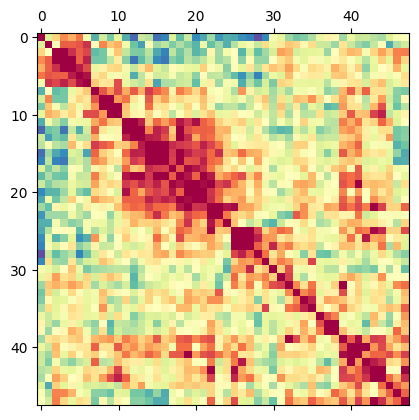

In [58]:
from scipy.cluster.hierarchy import linkage, leaves_list
C = mdlCs["Free"]
which_order = "Cstar"
CC = C[which_order]
link = linkage(CC, method = 'average')
leaf_order = leaves_list(link)
CC = CC[leaf_order][:,leaf_order]
matshow(CC, vmin=-20,vmax=100, cmap=cm.Spectral_r);


In [12]:
import mmf
reload(mmf)
U,Sl,Al, removed, kept = mmf.MMF(CC,47, 2)

Level 1: best_El=2868.78 best_inds=[16, 15]


Level 2: best_El=3454.18 best_inds=[21, 19]


Level 3: best_El=3547.98 best_inds=[37, 38]


Level 4: best_El=3538.48 best_inds=[12, 13]


Level 5: best_El=3648.91 best_inds=[34, 33]


Level 6: best_El=3875.85 best_inds=[17, 20]


Level 7: best_El=4365.97 best_inds=[3, 2]


Level 8: best_El=4430.94 best_inds=[37, 36]


Level 9: best_El=4648.90 best_inds=[43, 44]


Level 10: best_El=4554.09 best_inds=[11, 21]


Level 11: best_El=4789.33 best_inds=[24, 22]


Level 12: best_El=5193.29 best_inds=[18, 11]


Level 13: best_El=5062.48 best_inds=[34, 35]


Level 14: best_El=4457.57 best_inds=[45, 41]


Level 15: best_El=5293.14 best_inds=[17, 23]


Level 16: best_El=5125.95 best_inds=[27, 26]


Level 17: best_El=5897.76 best_inds=[5, 6]


Level 18: best_El=6080.26 best_inds=[30, 29]


Level 19: best_El=6155.17 best_inds=[46, 47]


Level 20: best_El=6185.87 best_inds=[40, 39]


Level 21: best_El=5947.90 best_inds=[9, 10]


Level 22: best_El=6054.56 best_inds=[45, 24]


Level 23: best_El=6229.94 best_inds=[3, 0]


Level 24: best_El=6034.94 best_inds=[16, 14]


Level 25: best_El=6316.64 best_inds=[31, 32]


Level 26: best_El=6795.08 best_inds=[12, 16]


Level 27: best_El=6757.31 best_inds=[28, 27]


Level 28: best_El=6920.92 best_inds=[42, 43]


Level 29: best_El=5601.20 best_inds=[8, 7]


Level 30: best_El=7014.95 best_inds=[5, 4]


Level 31: best_El=8921.52 best_inds=[17, 18]


Level 32: best_El=8917.67 best_inds=[37, 34]


Level 33: best_El=8763.62 best_inds=[5, 1]


Level 34: best_El=9116.99 best_inds=[45, 40]


Level 35: best_El=10159.78 best_inds=[30, 31]
Level 36: best_El=10466.09 best_inds=[28, 25]


Level 37: best_El=10086.35 best_inds=[9, 8]
Level 38: best_El=11936.14 best_inds=[30, 37]


Level 39: best_El=15795.91 best_inds=[28, 9]
Level 40: best_El=13726.95 best_inds=[28, 45]


Level 41: best_El=15095.74 best_inds=[46, 42]
Level 42: best_El=15815.20 best_inds=[46, 30]


Level 43: best_El=51140.10 best_inds=[28, 5]
Level 44: best_El=41204.54 best_inds=[17, 3]


Level 45: best_El=25271.12 best_inds=[12, 46]
Level 46: best_El=83.94 best_inds=[12, 28]
Level 47: best_El=0.00 best_inds=[17, 12]


Text(0, 0.5, 'Rows arranged by order of removal')

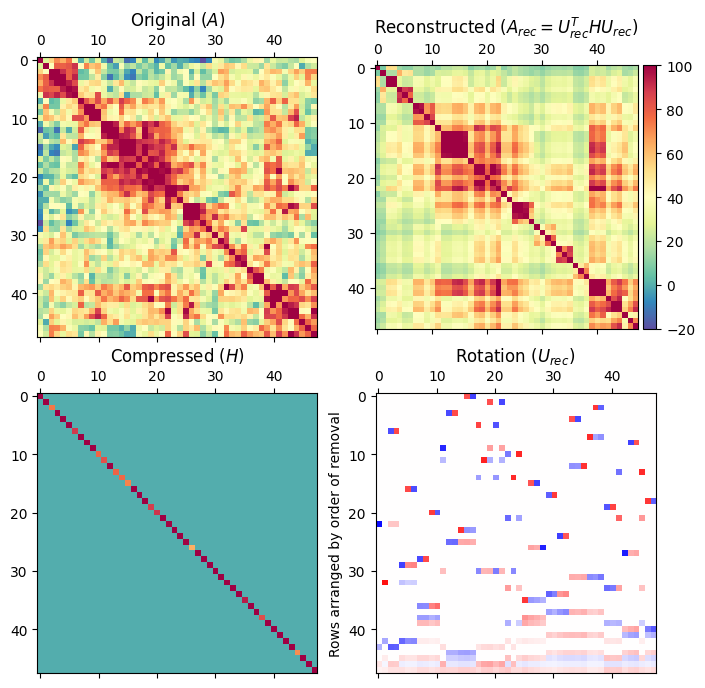

In [59]:
Arec, Urec, H = mmf.rec(Al, U, Sl, 47)
assert allclose( Urec.T @ H @ Urec, Arec)
figure(figsize=(8,8))
subplot(221); matshow(CC,         cmap=cm.Spectral_r, vmin=-20,vmax=100, fignum=False); title("Original ($A$)")
subplot(223); matshow(H,          cmap=cm.Spectral_r, vmin=-20,vmax=100, fignum=False); title("Compressed ($H$)")
subplot(222); im3 = matshow(Arec, cmap=cm.Spectral_r, vmin=-20,vmax=100, fignum=False); title("Reconstructed ($A_{rec} = U_{rec}^T H U_{rec}$)")
divider = make_axes_locatable(gca())
cax = divider.append_axes("right", size="5%", pad=0.05)
colorbar(im3, cax=cax)
leaf_order = removed + kept
subplot(224); matshow(Urec[leaf_order], cmap=cm.bwr, vmin=-1, vmax=1, fignum=False); title("Rotation ($U_{rec}$)"); ylabel("Rows arranged by order of removal")
